In [1]:
import sys
sys.path.insert(0, "..")

In [2]:
from utils import access_raster
from glob import glob
import re
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from copy import deepcopy
from scipy.stats import gaussian_kde
import seaborn as sns
import random
from scipy import optimize

In [3]:
basepath = "/home/abetatos/Escritorio/TFM_Dataset/3.Basedataset/"
aspect_path = basepath + "SCE"
hs_path = basepath + "HS"

is_tiff = lambda x: re.search(".tiff?$", x)

def get_dataframe(path, key): 
    files = filter(is_tiff, glob(path + "/**/*", recursive=True))
    df = pd.DataFrame(files, columns=[key])
    df['file'] = df[key].apply(lambda p: Path(p).parts[-2])
    df = df.set_index("file")
    return df

def get_array(raster): 
    array = raster['array'][0]
    nodata = raster['meta']['nodata']
    array[array==nodata]=0
    return array

In [4]:
df = get_dataframe(aspect_path, "SCE")[1:]
df['HS'] = get_dataframe(hs_path, "HS")['HS']
len(df)

15

In [5]:
def get_mapping(series):
    aspect_raster = access_raster(series['SCE'])
    hs_raster = access_raster(series['HS'])

    aspect_array = get_array(aspect_raster)
    hs_array = get_array(hs_raster)
    
    mapping = [[a, hs] for aspect_line, hs_line in zip(aspect_array, hs_array) 
                       for a, hs in zip(aspect_line, hs_line)
                       if hs > 0]
    
    return mapping

        
def fit_curve(x, y, ax): 
    def test_func(x, a, b):
        return a * x**2 + b
    try:
        params, params_covariance = optimize.curve_fit(test_func, x, y, p0=[1, 0],
                                                method="trf", absolute_sigma=True)
    except RuntimeError: 
        print("Optimal parameters not found, fit won't be displayed")
        plt.show()
        return None
        

    params, params_covariance = optimize.curve_fit(test_func, x, y, p0=[1, 0],
                                                method="trf", absolute_sigma=True)

    # plt.figure(figsize=(6, 4))
    # plt.scatter(x, y, label='Data', s=1)

    x, y = zip(*sorted(zip(x, y)))
    x, y = np.array(x), np.array(y)
    fitted_y = test_func(x, params[0], params[1])
    ax.plot(x, fitted_y,
            label='Linear regression', color="red")

    ax.legend(loc='best')

    plt.show()
    print(f"Fitted function: {round(params[0]*1e5, 3)}*10^-5 * x + {round(params[1], 3)}")
    
    
    mse = np.mean((y - fitted_y) ** 2)
    print("MSE:", mse)
    ss_res = np.sum((y - fitted_y) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    r_sq = 1 - (ss_res / ss_tot)
    print("R^2:", r_sq)
    
    return r_sq

def plot_map(_mapping):
    mapping = deepcopy(_mapping)
    random.shuffle(mapping)

    x, y = zip(*mapping[:10000])
    x, y = np.array(x), np.array(y)
    xy = np.vstack([x,y])
    kernel = gaussian_kde(xy)(xy)
    
    fig, ax = plt.subplots()
    ax.scatter(x, y, c=kernel, s=1, label="scatter plot")
    
    fit_curve(x, y, ax)
    
    return x

def plot_slices(mapping): 
    df = pd.DataFrame(mapping)
    df[0] = df[0].apply(lambda x: round(x, 2))
    new_mapping = df.groupby(0).apply(np.mean, axis=0).values

    plot_map(new_mapping)
    return df

____________________________________________________________________________________________________ 
 HS_Saflischpass_20220512_1m_epsg2056


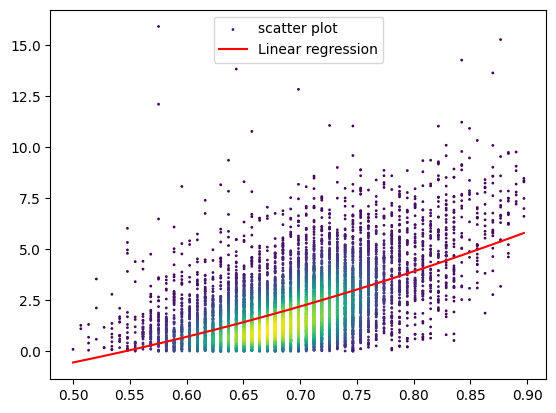

Fitted function: 1142836.764*10^-5 * x + -3.398
MSE: 1.9867907
R^2: 0.29789453744888306


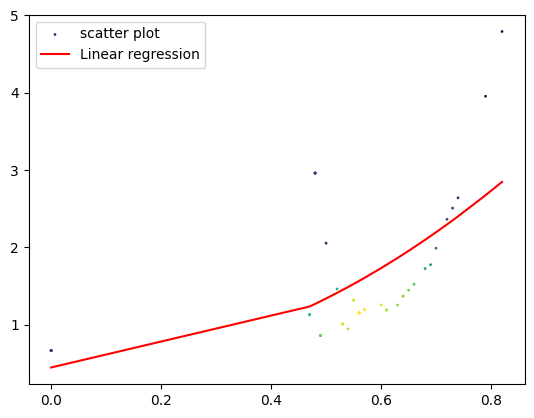

Fitted function: 357181.683*10^-5 * x + 0.444
MSE: 0.5144971985781369
R^2: 0.3524700347118741
____________________________________________________________________________________________________ 
 HS_Laucherenalp_20220511_1m_epsg2056


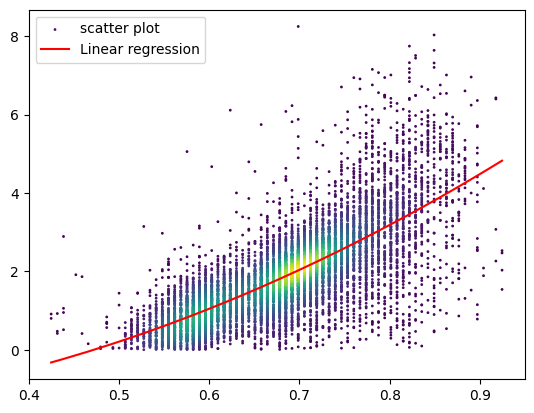

Fitted function: 763263.257*10^-5 * x + -1.701
MSE: 0.62629133
R^2: 0.540978729724884


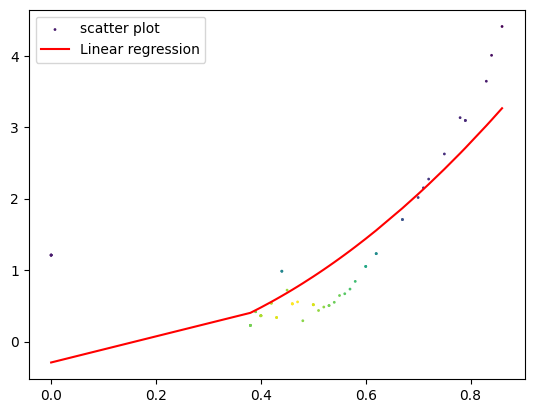

Fitted function: 480883.114*10^-5 * x + -0.292
MSE: 0.30426669928736105
R^2: 0.7136976958613611
____________________________________________________________________________________________________ 
 snowmap_2014_ads_100_extent_maskiert_nosnow0_noausreisser


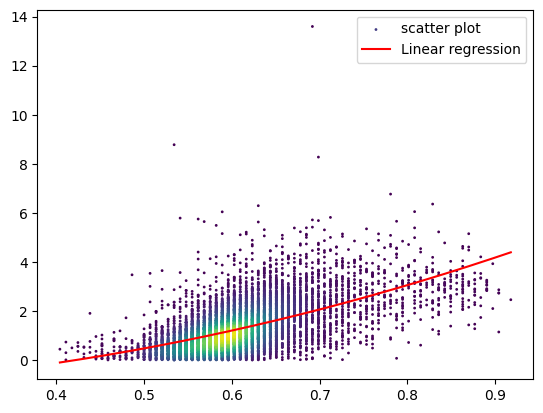

Fitted function: 661461.915*10^-5 * x + -1.182
MSE: 0.57986736
R^2: 0.3318566679954529


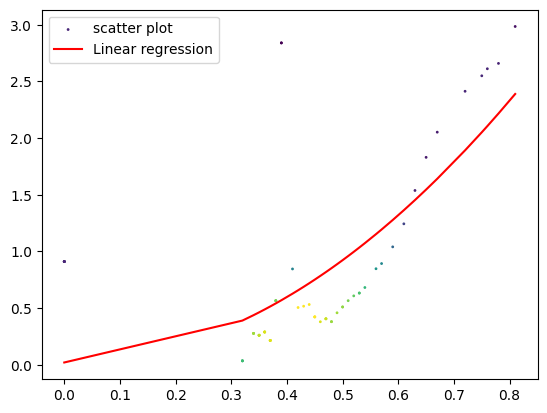

Fitted function: 361029.365*10^-5 * x + 0.021
MSE: 0.330040386081416
R^2: 0.46201981192994857
____________________________________________________________________________________________________ 
 HS_Davos_20200406_2m_epsg2056


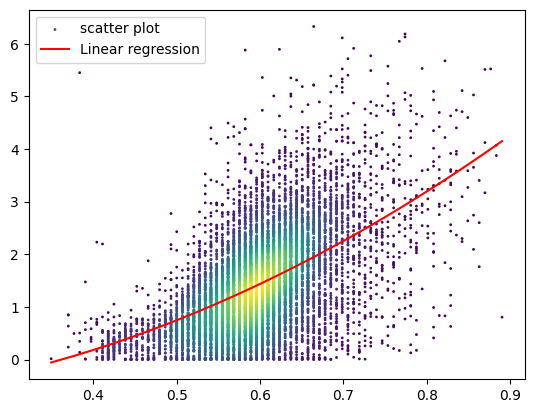

Fitted function: 626948.559*10^-5 * x + -0.82
MSE: 0.6561711
R^2: 0.2860666513442993


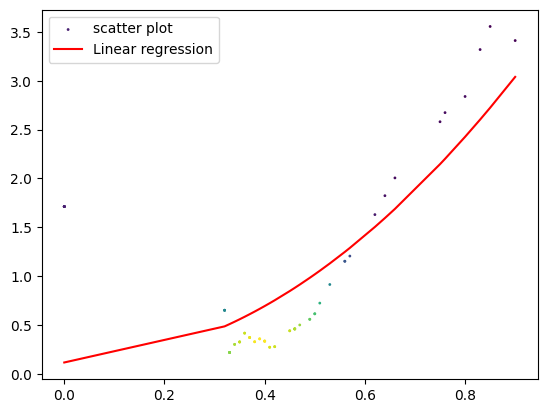

Fitted function: 360578.014*10^-5 * x + 0.118
MSE: 0.36036691053184156
R^2: 0.5268448396300798
____________________________________________________________________________________________________ 
 HS_Davos_20211604_2m_epsg2056


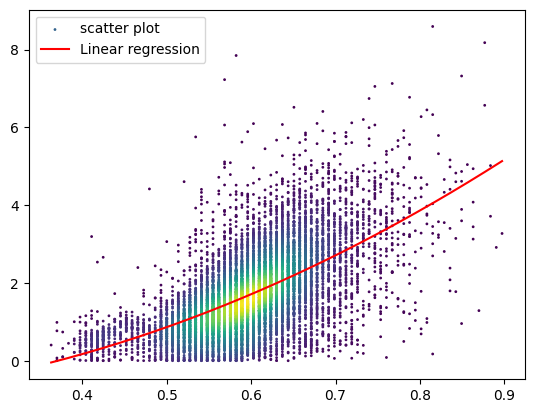

Fitted function: 768983.048*10^-5 * x + -1.058
MSE: 0.7495875
R^2: 0.3506664037704468


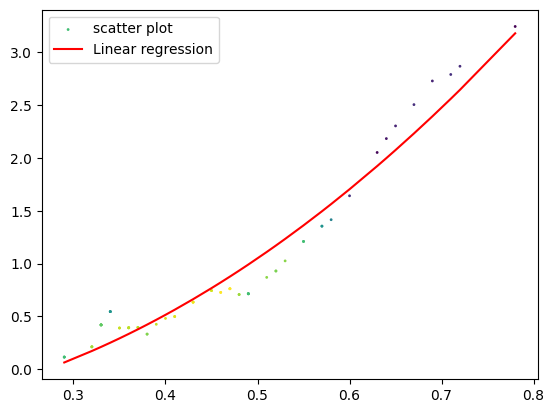

Fitted function: 594696.292*10^-5 * x + -0.437
MSE: 0.02818158786386979
R^2: 0.9487221946092447
____________________________________________________________________________________________________ 
 snowmap_2013_ads_80_extent_maskiert_nosnow0_noausreisser


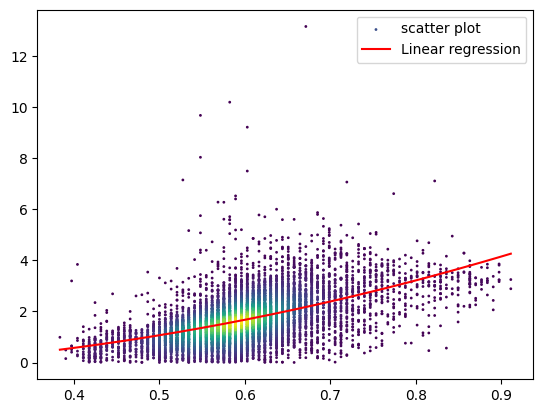

Fitted function: 549977.175*10^-5 * x + -0.308
MSE: 0.5800801
R^2: 0.29069316387176514


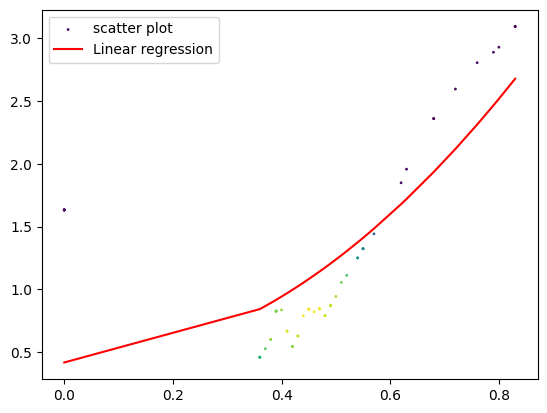

Fitted function: 327897.877*10^-5 * x + 0.418
MSE: 0.24191859012227818
R^2: 0.5459570620076868
____________________________________________________________________________________________________ 
 snowmap_2012_ads_80_extent_maskiert_nosnow0_noausreisser


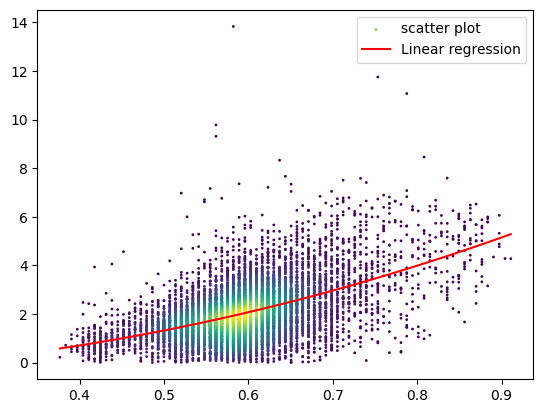

Fitted function: 683986.164*10^-5 * x + -0.393
MSE: 0.97232044
R^2: 0.2663971185684204


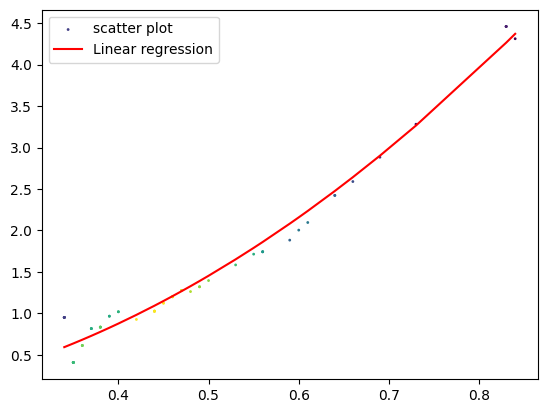

Fitted function: 640488.923*10^-5 * x + -0.148
MSE: 0.023548590905870477
R^2: 0.9769330844530183
____________________________________________________________________________________________________ 
 snowmap_2015_ads_100_extent_maskiert_nosnow0_noausreisser


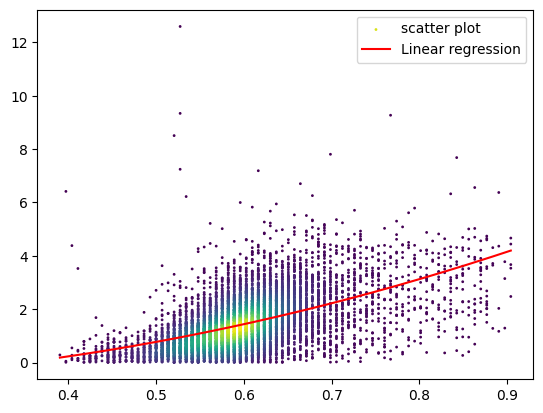

Fitted function: 603201.677*10^-5 * x + -0.736
MSE: 0.6776609
R^2: 0.2764101028442383


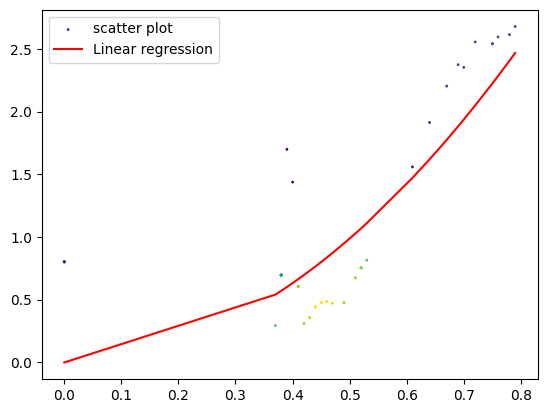

Fitted function: 395638.104*10^-5 * x + -0.002
MSE: 0.17656464081102077
R^2: 0.672380692989573
____________________________________________________________________________________________________ 
 snowmap_20160126_ads_100_extent_maskiert_nosnow0_noausreisser


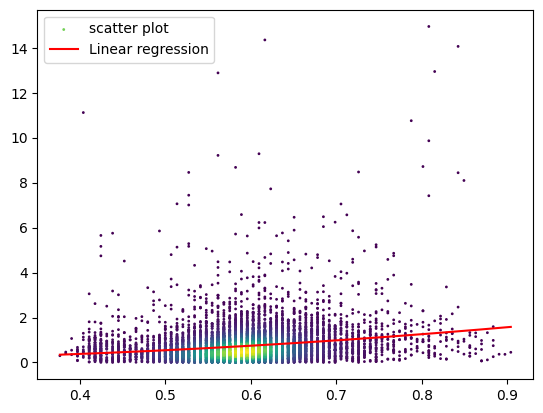

Fitted function: 182961.826*10^-5 * x + 0.088
MSE: 0.57866406
R^2: 0.035906851291656494


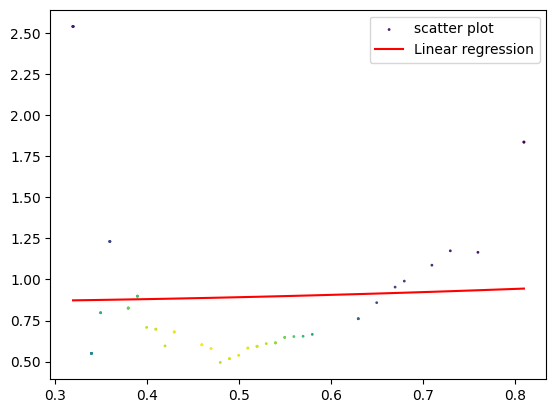

Fitted function: 12915.955*10^-5 * x + 0.86
MSE: 0.26819360401852615
R^2: 0.0011644997426082382
____________________________________________________________________________________________________ 
 HS_c_20220223_1m_epsg2056


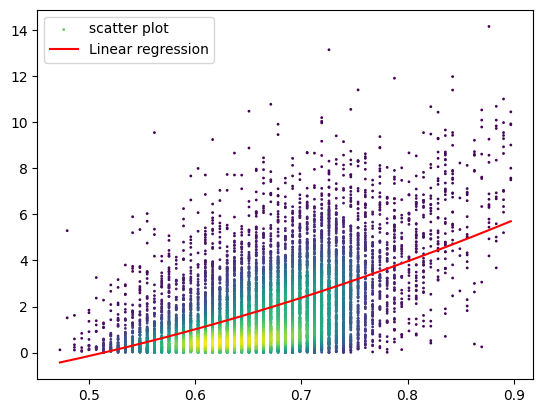

Fitted function: 1054084.548*10^-5 * x + -2.782
MSE: 2.4056904
R^2: 0.27467668056488037


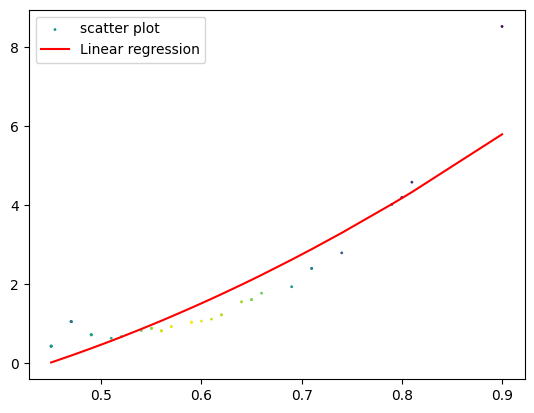

Fitted function: 953156.11*10^-5 * x + -1.925
MSE: 0.3531983389245493
R^2: 0.8375981214332886
____________________________________________________________________________________________________ 
 HS_Davos_20170316_2m_epsg2056


: 

: 

In [6]:
for index, series in df.iterrows(): 
    print("_"*100, "\n", series.name)
    mapping = get_mapping(series)
    plot_map(mapping)
    new_mapping = plot_slices(mapping)

In [ ]:
pd.DataFrame(mapping)[0].value_counts()

0
1.0    179350
0.0         2
Name: count, dtype: int64